## Librerias

In [257]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score, \
roc_curve, roc_auc_score, ConfusionMatrixDisplay, multilabel_confusion_matrix
import warnings
warnings.filterwarnings('ignore')

## Data

In [258]:
train = pd.read_csv("data/train.csv")

## Data exploration 

In [259]:
train.head()

,Id,target,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,44164,0,0.768219,68y,1,0.687930,2178.0,12,0,1,0,0.0
1,95356,0,0.289873,52y,0,0.385497,3750.0,16,0,1,0,1.0
2,108917,0,0.000000,54y,0,0.346503,6833.0,8,0,1,0,0.0
3,99039,0,0.046064,66y,1,0.407614,5200.0,6,0,1,0,1.0
4,116168,0,0.168771,45y,0,4702.000000,NaN,10,0,3,0,1.0


In [260]:
train.tail()

,Id,target,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
73358,25055,0,0.010468,45y,0,0.211663,12500.0,15,0,1,0,3.0
73359,105554,0,0.131250,42y,0,0.311538,5000.0,9,0,0,0,0.0
73360,129050,0,0.550527,59y,0,2777.000000,NaN,12,0,1,0,0.0
73361,94633,0,0.678651,31y,0,0.436990,3800.0,12,0,1,0,0.0
73362,88136,0,0.136699,58y,0,0.179301,16000.0,16,0,2,0,0.0


In [261]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73363 entries, 0 to 73362
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Id                                    73363 non-null  int64  
 1   target                                73363 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  73363 non-null  float64
 3   age                                   73363 non-null  object 
 4   NumberOfTime30-59DaysPastDueNotWorse  73363 non-null  int64  
 5   DebtRatio                             73363 non-null  float64
 6   MonthlyIncome                         58796 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       73363 non-null  int64  
 8   NumberOfTimes90DaysLate               73363 non-null  int64  
 9   NumberRealEstateLoansOrLines          73363 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  73363 non-null  int64  
 11  NumberOfDepende

In [262]:
train["target"].unique()

array([0, 1], dtype=int64)

In [263]:
train.isnull().sum()/len(train)*100

Id                                       0.000000
target                                   0.000000
RevolvingUtilizationOfUnsecuredLines     0.000000
age                                      0.000000
NumberOfTime30-59DaysPastDueNotWorse     0.000000
DebtRatio                                0.000000
MonthlyIncome                           19.856058
NumberOfOpenCreditLinesAndLoans          0.000000
NumberOfTimes90DaysLate                  0.000000
NumberRealEstateLoansOrLines             0.000000
NumberOfTime60-89DaysPastDueNotWorse     0.000000
NumberOfDependents                       2.647111
dtype: float64

In [264]:
train.describe()

,Id,target,RevolvingUtilizationOfUnsecuredLines,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,73363.000000,73363.000000,73363.000000,73363.000000,73363.000000,5.879600e+04,73363.000000,73363.000000,73363.000000,73363.000000,71421.000000
mean,75035.459564,0.065919,5.884904,0.410507,359.752537,6.649145e+03,8.443916,0.256546,1.019928,0.231847,0.755506
std,43303.736606,0.248142,235.508449,4.090014,2477.648064,1.046163e+04,5.142232,4.066573,1.136357,4.052280,1.111715
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37449.000000,0.000000,0.029752,0.000000,0.173446,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75032.000000,0.000000,0.154688,0.000000,0.365737,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112628.500000,0.000000,0.558686,0.000000,0.863514,8.300000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,149998.000000,1.000000,29110.000000,98.000000,329664.000000,1.560100e+06,57.000000,98.000000,32.000000,98.000000,13.000000


In [265]:
train.describe(include=object).columns

Index(['age'], dtype='object')

<Axes: xlabel='target', ylabel='percent'>

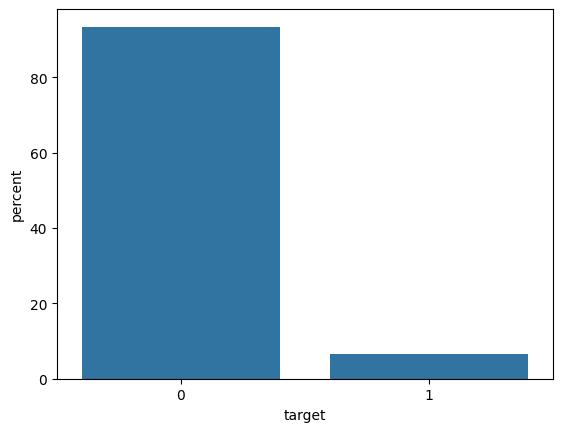

In [266]:
sns.countplot(train, x="target", stat="percent")

In [267]:
#sns.histplot(train, x="RevolvingUtilizationOfUnsecuredLines")

<Axes: xlabel='NumberOfTime30-59DaysPastDueNotWorse', ylabel='count'>

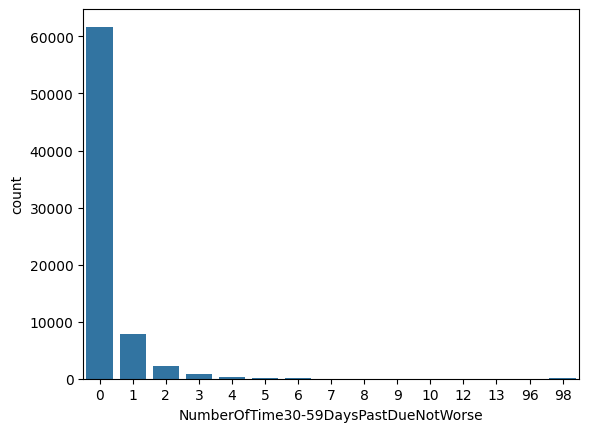

In [268]:
sns.countplot(train, x="NumberOfTime30-59DaysPastDueNotWorse")

In [269]:
# histplot de todas las continuas

In [270]:
train.columns

Index(['Id', 'target', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

<Axes: xlabel='NumberOfOpenCreditLinesAndLoans', ylabel='Count'>

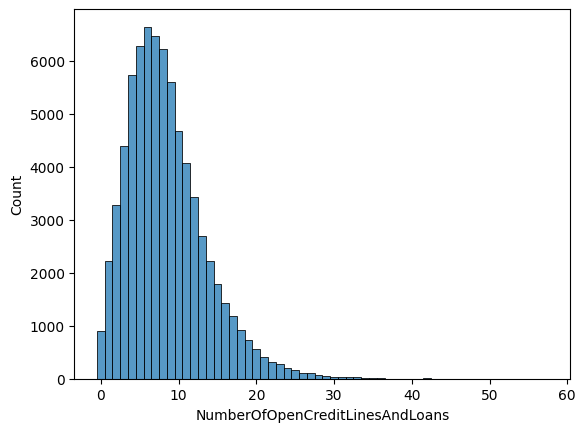

In [271]:
sns.histplot(train, x="NumberOfOpenCreditLinesAndLoans", discrete=True)

<Axes: xlabel='NumberOfTimes90DaysLate', ylabel='count'>

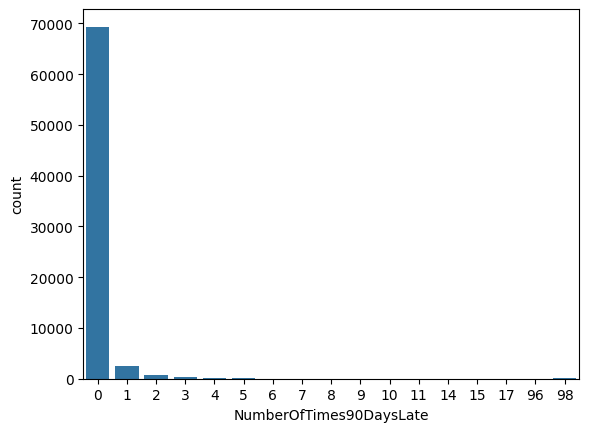

In [272]:
sns.countplot(train, x='NumberOfTimes90DaysLate')

In [273]:
train['NumberOfTimes90DaysLate'].unique()

array([ 0,  2,  1,  4,  3, 98,  7,  5,  6, 11, 10,  9, 17, 96,  8, 15, 14],
      dtype=int64)

<Axes: xlabel='NumberRealEstateLoansOrLines', ylabel='count'>

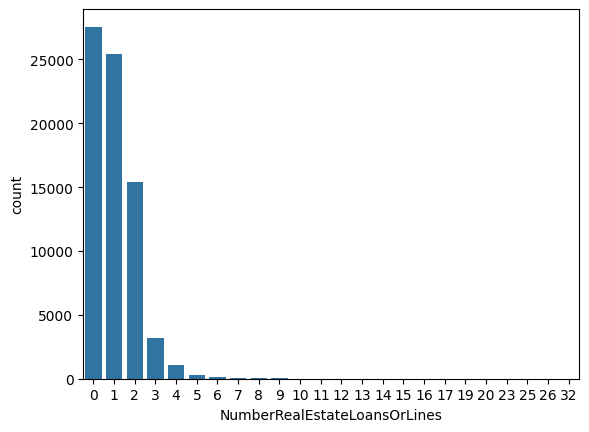

In [274]:
sns.countplot(train, x='NumberRealEstateLoansOrLines')

In [275]:
train["NumberRealEstateLoansOrLines"].unique()

array([ 1,  3,  0,  2, 10,  5,  4,  7,  6, 12, 13,  8,  9, 11, 17, 14, 23,
       15, 16, 26, 19, 20, 32, 25], dtype=int64)

<Axes: xlabel='NumberOfTime60-89DaysPastDueNotWorse', ylabel='count'>

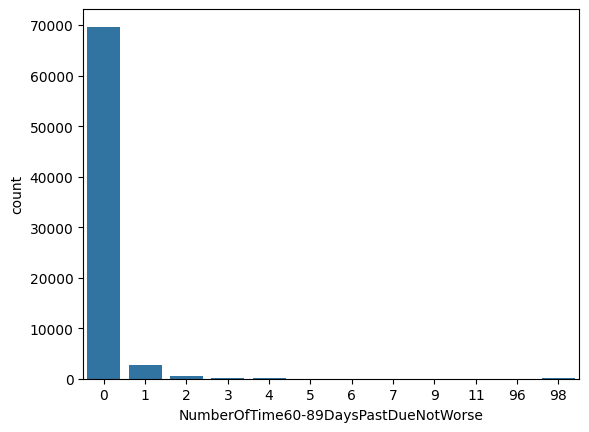

In [276]:
sns.countplot(train, x='NumberOfTime60-89DaysPastDueNotWorse')

<Axes: xlabel='NumberOfDependents', ylabel='count'>

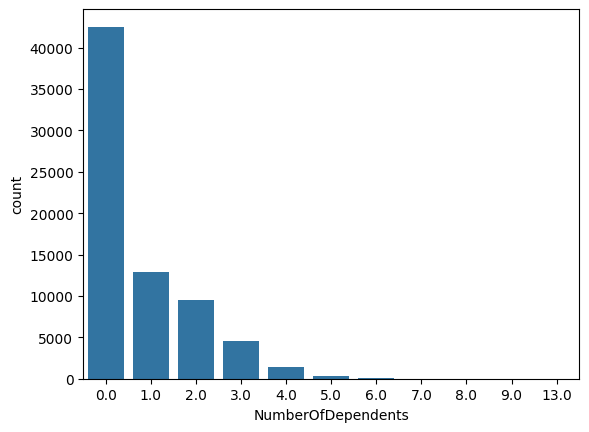

In [277]:
sns.countplot(train, x="NumberOfDependents")

<Axes: >

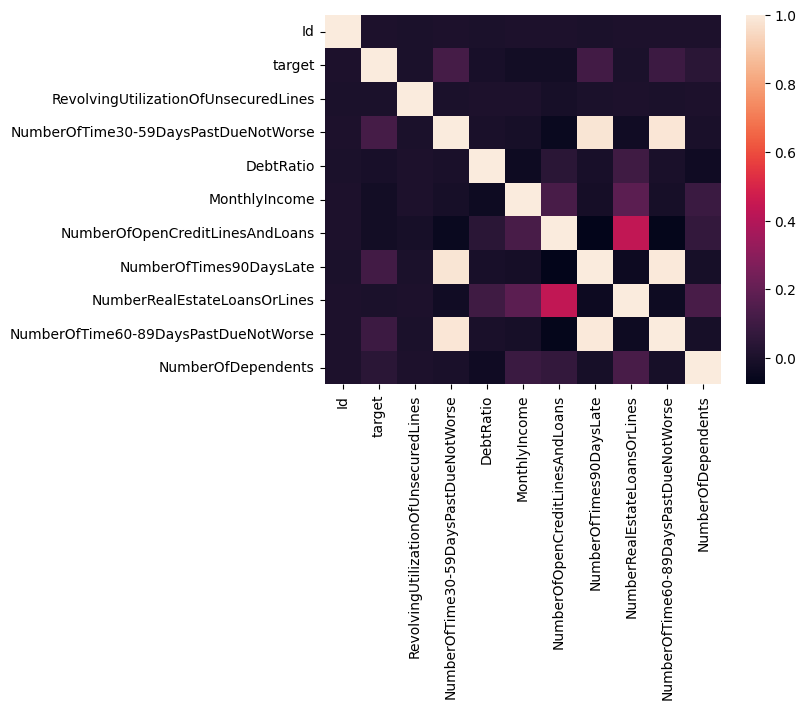

In [278]:
sns.heatmap(train.drop("age",axis=1).corr())

Hasta este punto hemos hecho la exploración para poder hacer el primer modelo. Una vez hecho el primer modelo exploraremos más a fondo para mejorar el mismo.

## Data processing

In [279]:
df = train.copy()

In [280]:
df.dropna(inplace=True)
df.drop("Id", axis=1, inplace=True)

In [281]:
df.columns

Index(['target', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [282]:
df["age"] = df["age"].str.removesuffix("y")
df["age"]

0        68
1        52
2        54
3        66
5        73
         ..
73357    40
73358    45
73359    42
73361    31
73362    58
Name: age, Length: 58796, dtype: object

In [283]:
df["age"] = df["age"].astype(int)
df["age"].dtypes

dtype('int32')

In [284]:
df["NumberOfDependents"] = df["NumberOfDependents"].astype(int)
df["NumberOfDependents"].dtypes

dtype('int32')

## X e Y

In [285]:
X = df.drop("target",axis=1)
y = df["target"]

In [286]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [287]:
y_train

12890    0
37906    1
2420     1
21238    0
61177    0
        ..
67838    0
47675    0
1068     0
19758    0
70420    0
Name: target, Length: 47036, dtype: int64

## Escalating

In [288]:
escalator = MinMaxScaler()
X_train_esc = escalator.fit_transform(X_train)
X_test_esc = escalator.transform(X_test)

## Cross-validation

In [289]:
"""
modelos = {"LogisticRegression": LogisticRegression(),
           "SVC": SVC(),
           "DecisionTree": DecisionTreeClassifier(),
           "RamdomForestClassifier": RandomForestClassifier(),
           "VotingClassifier": VotingClassifier(estimators=[
        ('lr', LogisticRegression(random_state=42)),
        ('rf', RandomForestClassifier(random_state=42)),
        ('svc', SVC(random_state=42))
           ])
           }
           """

'\nmodelos = {"LogisticRegression": LogisticRegression(),\n           "SVC": SVC(),\n           "DecisionTree": DecisionTreeClassifier(),\n           "RamdomForestClassifier": RandomForestClassifier(),\n           "VotingClassifier": VotingClassifier(estimators=[\n        (\'lr\', LogisticRegression(random_state=42)),\n        (\'rf\', RandomForestClassifier(random_state=42)),\n        (\'svc\', SVC(random_state=42))\n           ])\n           }\n           '

In [290]:
"""
resultados_dict = {}
metricas = ["accuracy", "f1_macro"]


for nombre_modelo, modelo in modelos.items():
    cv_resultados = cross_validate(modelo, X_train_esc, y_train, cv=5, scoring=metricas)
    
    for metrica in metricas:
        clave = f"{nombre_modelo}_{metrica}"
        resultados_dict[clave] = cv_resultados[f"test_{metrica}"].mean()

        for metrica in metricas:
            clave = f"{nombre_modelo}_{metrica}"
            resultados_dict[clave] = cv_resultados[f"test_{metrica}"].mean()

resultados_df = pd.DataFrame([resultados_dict])

resultados_df.T
"""

'\nresultados_dict = {}\nmetricas = ["accuracy", "f1_macro"]\n\n\nfor nombre_modelo, modelo in modelos.items():\n    cv_resultados = cross_validate(modelo, X_train_esc, y_train, cv=5, scoring=metricas)\n    \n    for metrica in metricas:\n        clave = f"{nombre_modelo}_{metrica}"\n        resultados_dict[clave] = cv_resultados[f"test_{metrica}"].mean()\n\n        for metrica in metricas:\n            clave = f"{nombre_modelo}_{metrica}"\n            resultados_dict[clave] = cv_resultados[f"test_{metrica}"].mean()\n\nresultados_df = pd.DataFrame([resultados_dict])\n\nresultados_df.T\n'

In [291]:
#CV = resultados_df.T

In [292]:
CV

,0
LogisticRegression_accuracy,0.931159
LogisticRegression_f1_macro,0.489760
SVC_accuracy,0.930989
SVC_f1_macro,0.485789
DecisionTree_accuracy,0.891339
DecisionTree_f1_macro,0.600394
RamdomForestClassifier_accuracy,0.933434
RamdomForestClassifier_f1_macro,0.616576
VotingClassifier_accuracy,0.931032
VotingClassifier_f1_macro,0.487018


## Entrenar modelo

In [294]:
rfc = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16,
                                 n_jobs=-1, random_state=42)
rfc.fit(X_train_esc, y_train)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, n_jobs=-1,
                       random_state=42)

In [295]:
y_pred = rfc.predict(X_test_esc)

In [296]:
rfc.score(X_test_esc, y_test)

0.9357142857142857

In [298]:
f1_score(y_test, y_pred)

0.15625

## Training prediction set

In [308]:
train_df = train.copy()

In [309]:
train_df.dropna(inplace=True)

In [310]:
y_df = train_df["target"]
train_df.drop(columns=["Id", "target"], inplace=True)

In [311]:
train_df["age"] = train_df["age"].str.removesuffix("y")
train_df["age"] = train_df["age"].astype(int)
train_df["NumberOfDependents"] = train_df["NumberOfDependents"].astype(int)

In [312]:
train_df_esc = escalator.fit_transform(train_df)

In [317]:
rfc.fit(train_df_esc, y_df)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, n_jobs=-1,
                       random_state=42)

## Charging prediction set

In [373]:
X_pred = pd.read_csv("data/test.csv")
X_pred.head()

,Id,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,15576,0.051782,53y,0,0.009350,2245.0,3,0,0,0,0.0
1,94308,0.022133,57y,0,0.319562,7672.0,26,0,1,0,2.0
2,53983,0.013693,68y,0,0.139237,4064.0,4,0,0,0,1.0
3,61359,0.018568,74y,0,0.018760,10500.0,27,0,0,0,0.0
4,71383,0.008630,66y,0,9.000000,NaN,5,0,0,0,0.0


In [374]:
X_pred.drop(columns=["Id"], inplace=True)

In [375]:
X_pred["NumberOfDependents"].fillna(X_pred["NumberOfDependents"].median(), inplace=True)

In [376]:
X_pred["NumberOfDependents"].unique()

array([ 0.,  2.,  1.,  3.,  5.,  4.,  6.,  8., 10.,  7.,  9.])

In [377]:
X_pred["MonthlyIncome"].fillna(X_pred["MonthlyIncome"].mean(), inplace=True)

In [378]:
X_pred["age"] = X_pred["age"].str.removesuffix("y")
X_pred["age"] = X_pred["age"].astype(int)
X_pred["NumberOfDependents"] = X_pred["NumberOfDependents"].astype(int)

In [379]:
X_pred.isnull().sum()

RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [380]:
y_pred_2 = rfc.predict(X_pred)

In [381]:
y_pred_2

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Prediction submit

In [382]:
predictions_submit = y_pred_2

In [383]:
predictions_submit.shape

(31442,)

In [384]:
sample = pd.read_csv("data/sample_submission.csv")

In [385]:
sample.shape

(31442, 2)

In [386]:
sample.head()

,Id,target
0,15576,0
1,94308,1
2,53983,1
3,61359,1
4,71383,0


In [387]:
submission = pd.DataFrame({"Id": sample['Id'], "target": predictions_submit})

In [388]:
def chequeator(df_to_submit):
    """
    Esta función se asegura de que tu submission tenga la forma requerida por Kaggle.
    
    Si es así, se guardará el dataframe en un `csv` y estará listo para subir a Kaggle.
    
    Si no, LEE EL MENSAJE Y HAZLE CASO.
    
    Si aún no:
    - apaga tu ordenador, 
    - date una vuelta, 
    - enciendelo otra vez, 
    - abre este notebook y 
    - leelo todo de nuevo. 
    Todos nos merecemos una segunda oportunidad. También tú.
    """
    if df_to_submit.shape == sample.shape:
        if df_to_submit.columns.all() == sample.columns.all():
            if df_to_submit.Id.all() == sample.Id.all():
                print("You're ready to submit!")
                submission.to_csv("submission.csv", index = False) #muy importante el index = False
                urllib.request.urlretrieve("https://i.kym-cdn.com/photos/images/facebook/000/747/556/27a.jpg", "gfg.png")     
                img = Image.open("gfg.png")
                img.show()   
            else:
                print("Check the ids and try again")
        else:
            print("Check the names of the columns and try again")
    else:
        print("Check the number of rows and/or columns and try again")
        print("\nMensaje secreto de Clara: No me puedo creer que después de todo este notebook hayas hecho algún cambio en las filas de `diamonds_test.csv`. Lloro.")

In [389]:
chequeator(submission)

You're ready to submit!


NameError: name 'urllib' is not defined